# this script is used to get statistic result of paper in 5 years

In [25]:
import glob
import json
import ast
import matplotlib.pyplot as plt
import matplotlib 
import xlrd
from matplotlib.ticker import PercentFormatter

In [26]:
#define dic
json_path = '..\\bin\\Extraced_results\\'
# input file dir
sfari_gene_dic='..\\bin\\Genotype_list\\SFARI-Gene_genes_12-11-2020release_12-19-2020export.xlsx'
phenotype_upperclass_file = '..\\bin\\Phenotype_list\\c2upper.txt'
NPMI_sort_ngp_and_NPMI_xlsx_dic = '.\\inputfile_for_analysis\\NPMI_by_threshold.xlsx'
# output file dir
statistic_dic='.\\statistic_result\\'

In [3]:
jsons = glob.glob("{}\\*.json".format(json_path)) 

In [4]:
# figure setting
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
n_print = 30

In [5]:
# outlier list
genes_outlier = ['T','CS','BDNF','CP','APP','CAD','CA1','CA3','CD4','CRP','GFAP',
                 'MAF','NHS','OXT','PGC','PSD','SCD','SDC','SMS','EGFR','TLR4','APC','SDS',
                 'FST','ATM','MYC','NLRP3','FUS', 'CFTR']


In [6]:
# years we want to analysis
year_list = ['2016','2017','2018','2019','NULL']

In [38]:


# collect information of every year, abstract and full_article separate
every_year_paper_num = {'2015':{'abstract':0,'full_article':0},
                      '2016':{'abstract':0,'full_article':0},
                      '2017':{'abstract':0,'full_article':0},
                      '2018':{'abstract':0,'full_article':0},
                      '2019':{'abstract':0,'full_article':0},
                      '2020':{'abstract':0,'full_article':0},
                      "NULL":{'abstract':0,'full_article':0}}

every_year_gene = {'2015':{'abstract':[],'full_article':[]},
                      '2016':{'abstract':[],'full_article':[]},
                      '2017':{'abstract':[],'full_article':[]},
                      '2018':{'abstract':[],'full_article':[]},
                      '2019':{'abstract':[],'full_article':[]},
                      '2020':{'abstract':[],'full_article':[]},
                      "NULL":{'abstract':[],'full_article':[]}}

every_year_phenotype = {'2015':{'abstract':[],'full_article':[]},
                      '2016':{'abstract':[],'full_article':[]},
                      '2017':{'abstract':[],'full_article':[]},
                      '2018':{'abstract':[],'full_article':[]},
                      '2019':{'abstract':[],'full_article':[]},
                      '2020':{'abstract':[],'full_article':[]},
                      "NULL":{'abstract':[],'full_article':[]}}

for index,item in enumerate(jsons) :
    with open(item, 'r', encoding='utf-8-sig') as f:
        json_data = json.load(f)
        
        # get the genes of this paper 
        all_gene = []
        for sentence in json_data['Sentences']:
            all_gene[0:0] = json_data['Sentences'][sentence]['Gene']
        all_gene_temp = list(set(all_gene))# delete duplication
        
        # delete gene outlier 
        all_gene_temp2 = [x for x in all_gene_temp if x not in genes_outlier]
        # delete 2 words gene
        all_gene = [x for x in all_gene_temp2 if len(x)>2]
        
        # get the phenotype of this paper 
        all_phenotype = []
        for sentence in json_data['Sentences']:
            for phenotype in  json_data['Sentences'][sentence]['Normolized phenotype']:
                all_phenotype.append(phenotype[1])
        all_phenotype = list(set(all_phenotype))# delete duplication
        
        # get the publish year of paper
        title = json_data['Title']
        start = title.find('(Published on ')
        end = len(title)
        time = title[start+14:end-1]
        
        # get the number and gene and phenotype of paper in different years
        if "NULL" not in time :
            year_start = time.find('201')
            year = time[year_start:year_start+4]
            if year == '':
                year_start = time.find('202')
                year = time[year_start:year_start+4]
                
            if 'abstract' in time:
                every_year_paper_num[year]['abstract'] +=1
                every_year_gene[year]['abstract'][0:0] = all_gene
                every_year_phenotype[year]['abstract'][0:0] = all_phenotype
                
            else:
                every_year_paper_num[year]['full_article'] +=1
                every_year_gene[year]['full_article'][0:0] = all_gene
                every_year_phenotype[year]['full_article'][0:0] = all_phenotype
        else:
            if 'abstract' in time:
                every_year_paper_num["NULL"]['abstract'] +=1
                every_year_gene["NULL"]['abstract'][0:0] = all_gene
                every_year_phenotype["NULL"]['abstract'][0:0] = all_phenotype
            else:
                every_year_paper_num["NULL"]['full_article'] +=1
                every_year_gene["NULL"]['full_article'][0:0] = all_gene 
                every_year_phenotype["NULL"]['full_article'][0:0] = all_phenotype
for year in every_year_gene:
    for item in every_year_gene[year]:
        temp_set = set(every_year_gene[year][item])
        temp_dict={}
        for i in temp_set:
            temp_dict.update({i:every_year_gene[year][item].count(i)})
        every_year_gene[year][item] = temp_dict
for year in every_year_phenotype:
    for item in every_year_phenotype[year]:
        temp_set = set(every_year_phenotype[year][item])
        temp_dict={}
        for i in temp_set:
            temp_dict.update({i:every_year_phenotype[year][item].count(i)})
        every_year_phenotype[year][item] = temp_dict

In [8]:
# the function which can merge and add contents of dicts
from functools import reduce
def sum_dict(a,b):
    temp = dict()
    for key in a.keys()| b.keys(): 
        temp[key] = sum([d.get(key, 0) for d in (a, b)])
    return temp

In [9]:
# merge abstract and full_article
every_year_gene_merge = {}
for year in year_list:
    every_year_gene_merge[year] = []
every_year_phenotype_merge = {}
for year in year_list:
    every_year_phenotype_merge[year] = []   
    
for year in every_year_gene_merge:
    every_year_gene_merge[year] = reduce(sum_dict,[every_year_gene[year]['abstract'],every_year_gene[year]['full_article']])
for year in every_year_phenotype_merge:
    every_year_phenotype_merge[year] = reduce(sum_dict,[every_year_phenotype[year]['abstract'],every_year_phenotype[year]['full_article']])


In [10]:
# read c2upper, get the upperclass
with open(phenotype_upperclass_file, 'r', encoding='utf-8-sig') as o:  
    phenotype_upperclass =  ast.literal_eval(o.read())
phenotype_label_dict = {}
for phenotype in phenotype_upperclass:
    for upperclass in phenotype_upperclass[phenotype]:
        
        if upperclass not in phenotype_label_dict.keys():# 先把所有upperclass找出来
            phenotype_label_dict[upperclass] =[]

In [11]:
# read sfari
def read_sfari(sfari_gene_dic):
    wb = xlrd.open_workbook(sfari_gene_dic)
    sh = wb.sheet_by_name('Sheet2')
    sfari_gene_name = sh.col_values(1)
    sfari_gene_class = sh.col_values(2)
    sfari_gene_dict = dict(zip(sfari_gene_name,sfari_gene_class))  
    return sfari_gene_dict

sfari_gene_dict = read_sfari(sfari_gene_dic)

In [12]:

# draw gene figure
def draw_topngene_from_dict(dicdata,RANGE,filename):
    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    x = []
    y = []
    wordsize = 6
    for d in by_value:
        x.append(d[0])
        y.append(d[1])

    colorlist = []
    for item in x[0:RANGE]:
        if item[-1] == '1':
            colorlist.append('#ED1F23')
        elif item[-1] == '2':
            colorlist.append('#3853A4')
        elif item[-1] == '3':    
            colorlist.append('#69BD45')
        elif item[-1] == 'S':
            colorlist.append('#F7EC11')
        elif item[-1] == 'A':
            colorlist.append('#6F6F6E')
    plt.subplot(2,1,1)
    plt.tight_layout() 
    params = {
        'figure.figsize': '4.5, 7'
    }
    plt.rcParams.update(params)

    plt.barh(x[0:RANGE], y[0:RANGE],color = colorlist,height = 0.4)
    plt.rcParams['font.sans-serif'] = ['Arial']
    
    plt.xticks(fontsize=wordsize)
    plt.yticks(fontsize=wordsize)


    return 



# draw phenotype figure 
def draw_topnphenotype_from_dict(dicdata,RANGE,filename):

    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    x = []
    y = []
    wordsize = 6
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    
    colorlist = []
    for item in x[0:RANGE]:
        if 'Abnormality of the nervous system' in item:
            colorlist.append('#ED1F23')
        elif 'Neoplasm'  in item:
            colorlist.append('#3853A4')
        else:    
            colorlist.append('#69BD45')
    params = {
        'figure.figsize': '4.5,7'
    }
    plt.rcParams.update(params)
    plt.subplot(2,1,2) 
    plt.tight_layout() 

   
    plt.barh(x[0:RANGE], y[0:RANGE],color = colorlist,height = 0.4)
    plt.rcParams['font.sans-serif'] = ['Arial']
    
    plt.xticks(fontsize=wordsize)
    plt.yticks(fontsize=wordsize)


    return 



# draw top n gene and phenotype, use all paper together

In [13]:
all_gene = {}# store citation of genes in all paper 
for year in year_list:
    all_gene = reduce(sum_dict,[all_gene,every_year_gene_merge[year]])
    
all_phenotype = {}# store citation of phenotype in all paper 
for year in year_list:
    all_phenotype = reduce(sum_dict,[all_phenotype,every_year_phenotype_merge[year]])

n = 100
all_gene_top_n = {}
temp_list = sorted(all_gene.items(),key=lambda item:item[1],reverse=True)
temp_list = temp_list[:n]
for item in temp_list:
    all_gene_top_n[item[0]] = item[1]

all_phenotype_top_n = {}
temp_list = sorted(all_phenotype.items(),key=lambda item:item[1],reverse=True)
temp_list = temp_list[:n]
for item in temp_list:
    all_phenotype_top_n[item[0]] = item[1]

In [14]:
# add sfari label to gene dict
temp_gene_list = list(all_gene_top_n.keys())
for gene in temp_gene_list:
    if gene in sfari_gene_dict.keys():
        if sfari_gene_dict[gene] == 'S':
            label = sfari_gene_dict[gene]
        else:
            label = str(int(sfari_gene_dict[gene]))
    else:
        label = 'NA'    
    all_gene_top_n[gene+' | '+label] = all_gene_top_n.pop(gene)

In [15]:
# add upperclass to phenotype dict
temp_phenotype_list = list(all_phenotype_top_n.keys())
for phenotype in temp_phenotype_list:
    if phenotype in phenotype_upperclass.keys():
        label = ",".join(phenotype_upperclass[phenotype]) 
    else:
        label = 'NA'
    
    all_phenotype_top_n[phenotype+' | '+label] = all_phenotype_top_n.pop(phenotype)      

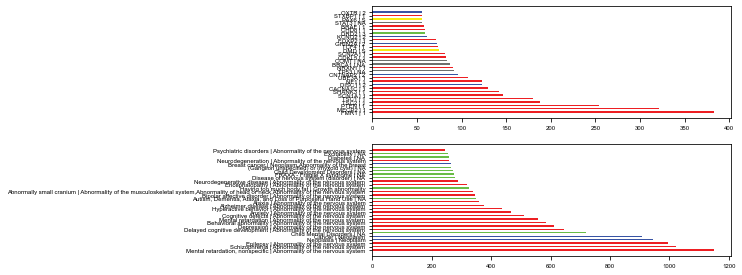

In [16]:
# draw figure
draw_topngene_from_dict(all_gene_top_n, n_print,statistic_dic+'all_gene')
draw_topnphenotype_from_dict(all_phenotype_top_n,n_print, statistic_dic+'all_phenotype')
plt.savefig(statistic_dic+'all_gene&phenotype'+'.pdf', dpi=300,bbox_inches='tight')
plt.savefig(statistic_dic+'all_gene&phenotype'+'.svg', dpi=300,bbox_inches='tight')
plt.savefig(statistic_dic+'all_gene&phenotype'+'.png', dpi=300,bbox_inches='tight')
plt.show()       

# draw top n intersection gene and phenotype, use all paper together

In [27]:
# get top n of every year
n = 100

# define dict
every_year_gene_top_n = {}
for year in year_list:
    every_year_gene_top_n[year] = {}
    
every_year_phenotype_top_n = {}
for year in year_list:
    every_year_phenotype_top_n[year] = {}
    
for year in every_year_gene_merge:
    temp_list = sorted(every_year_gene_merge[year].items(),key=lambda item:item[1],reverse=True)
    temp_list = temp_list[:n]
    for item in temp_list:
        every_year_gene_top_n[year][item[0]] = item[1]
     
for year in every_year_phenotype_merge:
    temp_list = sorted(every_year_phenotype_merge[year].items(),key=lambda item:item[1],reverse=True)
    temp_list = temp_list[:n]
    for item in temp_list:
        every_year_phenotype_top_n[year][item[0]] = item[1]


In [28]:
# get intersection of every year
gene_intersection = []
for year in every_year_gene_top_n:
    if year == year_list[0]:# when change yearto analysis, we also need to change this
        gene_intersection = every_year_gene_top_n[year].keys()
        continue
    gene_intersection = list(set(gene_intersection).intersection(set(every_year_gene_top_n[year].keys())))
    
phenotype_intersection = []
for year in every_year_phenotype_top_n:
    if year == year_list[0]:
        phenotype_intersection = every_year_phenotype_top_n[year].keys()
        continue
    phenotype_intersection = list(set(phenotype_intersection).intersection(set(every_year_phenotype_top_n[year].keys())))
      

In [29]:
# get the citation of intersection genes and phenotype 
top_n_gene_dict_all_year = {}
for year in year_list:
    top_n_gene_dict_all_year[year] = {}
    
for year in top_n_gene_dict_all_year:
    for gene in gene_intersection:  
        top_n_gene_dict_all_year[year][gene] = every_year_gene_merge[year][gene]
        

top_n_phenotype_dict_all_year = {}
for year in year_list:
    top_n_phenotype_dict_all_year[year] = {}
for year in top_n_phenotype_dict_all_year:
    for phenotype in phenotype_intersection:  
        top_n_phenotype_dict_all_year[year][phenotype] = every_year_phenotype_merge[year][phenotype]
        

In [30]:
# get gene label
gene_label_dict = {'1':[],'2':[],'3':[],'S':[]}
for gene in gene_intersection:
    if gene in sfari_gene_dict.keys():
        if sfari_gene_dict[gene] == 'S':
            gene_label_dict[sfari_gene_dict[gene]].append(gene)
        else:
            gene_label_dict[str(int(sfari_gene_dict[gene]))].append(gene)

In [31]:
# add sfari label
for year in top_n_gene_dict_all_year:
    for gene in gene_intersection:
        if gene in sfari_gene_dict.keys():
            if sfari_gene_dict[gene] == 'S':
                label = sfari_gene_dict[gene]
            else:
                label = str(int(sfari_gene_dict[gene]))
        else:
            label = 'NA'
        
        top_n_gene_dict_all_year[year][gene+' | '+label] = top_n_gene_dict_all_year[year].pop(gene)


In [32]:
# add upperclass label
success_list = []
error_list = []
for phenotype in phenotype_intersection:   
    if phenotype in phenotype_upperclass.keys():
        success_list.append(phenotype)
        for upperclass in phenotype_upperclass[phenotype]:
            phenotype_label_dict[upperclass].append(phenotype)
    else:
        error_list.append(phenotype)
        
for year in top_n_phenotype_dict_all_year:
    for phenotype in phenotype_intersection:
        if phenotype in phenotype_upperclass.keys():
            label = ",".join(phenotype_upperclass[phenotype]) 
        else:
            label = 'NA'
        
        top_n_phenotype_dict_all_year[year][phenotype+' | '+label] = top_n_phenotype_dict_all_year[year].pop(phenotype)      
        

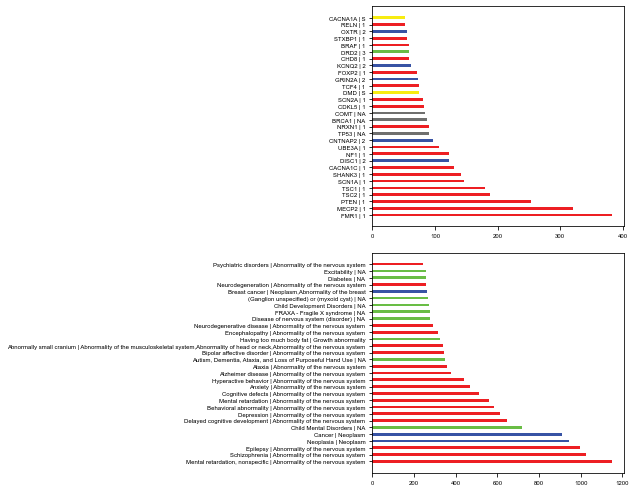

In [33]:
# draw figure
top_n_gene_dict = {}
top_n_phenotype_dict = {}

for year in top_n_gene_dict_all_year:
    top_n_gene_dict = reduce(sum_dict,[top_n_gene_dict,top_n_gene_dict_all_year[year]])


for year in top_n_phenotype_dict_all_year:
    top_n_phenotype_dict = reduce(sum_dict,[top_n_phenotype_dict,top_n_phenotype_dict_all_year[year]])



draw_topngene_from_dict(top_n_gene_dict, n_print,statistic_dic+'every_year_gene')
draw_topnphenotype_from_dict(top_n_phenotype_dict,n_print, statistic_dic+'every_year_phenotype')

plt.savefig(statistic_dic+'every_year_gene&phenotype_intersection'+'.pdf', dpi=300,bbox_inches='tight')
plt.savefig(statistic_dic+'every_year_gene&phenotype_intersection'+'.svg', dpi=300,bbox_inches='tight')
plt.savefig(statistic_dic+'every_year_gene&phenotype_intersection'+'.png', dpi=300,bbox_inches='tight')
plt.show()       

# get the percentage of 123s which NPMI>0

In [34]:
data = xlrd.open_workbook(NPMI_sort_ngp_and_NPMI_xlsx_dic) # read NPMI file, which actually can get from NPMI_above_zero.csv
# table = data.sheet_by_name('all pairs NPMI>0 ngp > 5')
table = data.sheet_by_name('all pairs NPMI >0')
data_dict = {}
for rowNum in range(table.nrows):
# get rid of first line
    if rowNum > 0:
        if table.row_values(rowNum)[0] != '':
            if table.row_values(rowNum)[0] not in data_dict.keys():
                data_dict[table.row_values(rowNum)[0]] = []
            data_dict[table.row_values(rowNum)[0]].append( [table.row_values(rowNum)[1],#phenotype
                                                            table.row_values(rowNum)[2],#gene_sfari_class
                                                            table.row_values(rowNum)[3],#NPMI
                                                            table.row_values(rowNum)[4],#n_g
                                                            table.row_values(rowNum)[5],#n_p
                                                            table.row_values(rowNum)[6]]#n_gp
                                                          )

In [35]:
def draw_from_dict(dicdata,RANGE,filename):

    colorlist = ['#DD2724','#35509A','#68B347','#ECE32B','#706F6E']
    wordsize = 6

    for index, label in enumerate(dicdata):
        
        plt.bar(label,dicdata[label] ,color = colorlist[index])
        # axes[subplot_number].barh(x[0:RANGE], y[0:RANGE])    # use this if subplot have only 1 row
        plt.ylim([0,1])
        plt.rcParams['font.sans-serif'] = ['Arial']
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
        
        plt.xticks(fontsize=wordsize)
        plt.yticks(fontsize=wordsize)

    plt.savefig(filename+'.pdf', dpi=300,bbox_inches='tight')
    plt.savefig(filename+'.svg', dpi=300,bbox_inches='tight')
    plt.savefig(filename+'.png', dpi=300,bbox_inches='tight')
    plt.show()
    return 

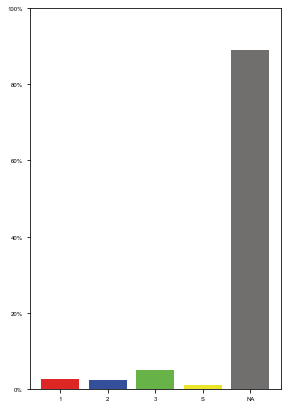

In [36]:
# draw statistic result of every gene
statistic_uniquegene_label_dict = {'1':0,'2':0,'3':0,'S':0,'NA':0}
for gene in data_dict:
    if type(data_dict[gene][0][1]) == float:
        data_dict[gene][0][1] = int(data_dict[gene][0][1])
    statistic_uniquegene_label_dict[str(data_dict[gene][0][1])] += 1
    

sum_num = 0
for label in statistic_uniquegene_label_dict:
    sum_num += statistic_uniquegene_label_dict[label]
for label in statistic_uniquegene_label_dict:
    statistic_uniquegene_label_dict[label] = statistic_uniquegene_label_dict[label]/sum_num
    
draw_from_dict(statistic_uniquegene_label_dict,100,
                '.\\statistic_result\\statistic_uniquegene_NPMI_by_threshold')

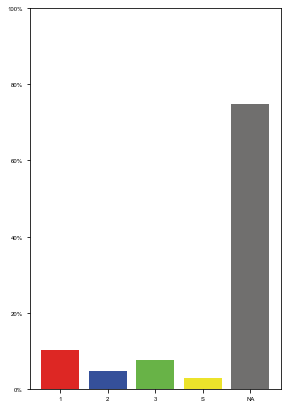

In [37]:
# draw statistic result of every pairs
statistic_pairs_label_dict = {'1':0,'2':0,'3':0,'S':0,'NA':0}
for gene in data_dict:
    for pair in data_dict[gene]:
        if type(pair[1]) == float:
            pair[1] = int(pair[1])
        statistic_pairs_label_dict[str(pair[1])] += 1
    
sum_num = 0
for label in statistic_pairs_label_dict:
    sum_num += statistic_pairs_label_dict[label]
for label in statistic_pairs_label_dict:
    statistic_pairs_label_dict[label] = statistic_pairs_label_dict[label]/sum_num
    

draw_from_dict(statistic_pairs_label_dict,100,
                '.\\statistic_result\\statistic_pairs_NPMI_by_threshold')